# Custom colour maps with Matplotlib

Gilles Ferrand<br>
2019-02-19

In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print mpl.__version__

2.1.1


## mock data

Let's generate some data on a 2D grid

In [3]:
res = 0.01
x = np.arange(0, np.pi, res)
y = np.arange(0, np.pi, res)
X,Y = np.meshgrid(x,y)
data = np.sin(-2*X)*np.sin(Y)
data = (data - data.min()) / (data.max() - data.min())
data.shape

(315, 315)

To display array ```data``` as an image we need some colour mapping.<br>
My default colour map is:

In [4]:
mpl.rcParams['image.cmap']

u'magma'

(the default default is 'viridis')

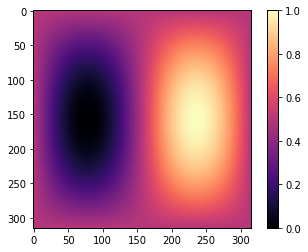

In [5]:
plt.imshow(data)
plt.colorbar();

The available cmaps, and how to chose them, are listed at https://matplotlib.org/tutorials/colors/colormaps.html

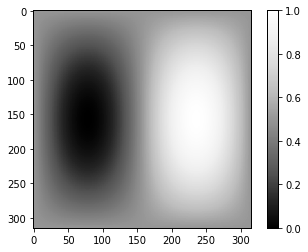

In [6]:
plt.imshow(data, cmap='Greys_r')
plt.colorbar();

## custom colour map

Let's define our own colour map.<br>
It takes a data value normalized in [0,1] and returns a RGB triple.<br>
For generality, it has some extra parameters.

In [7]:
def my_cmap_func(value, power_R=1., power_G=1., power_B=1.):
    R = value**power_R
    G = value**power_G
    B = value**power_B
    return (R,G,B)

For given parameters, we can make it a function of only ```value```:

In [8]:
func = lambda value : my_cmap_func(value, 0.5, 2, 1)

In [9]:
func(0.5)

(0.7071067811865476, 0.25, 0.5)

## 1) use as is
First we apply the cmap manually to the data array.

In [10]:
data_RGB = np.stack(func(data), axis=2)
data_RGB.shape

(315, 315, 3)

(applying our function returns a triplet of 2D arrays, we want them to be stacked in a single 3D array, this is how colour images are defined)

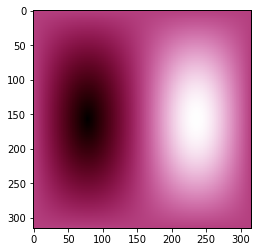

In [11]:
plt.imshow(data_RGB)

(```imshow()``` doesn't use a cmap this time, since it was provided an RGB image. Also calling ```colorbar()``` makes no sense.)

Let's try different curves.

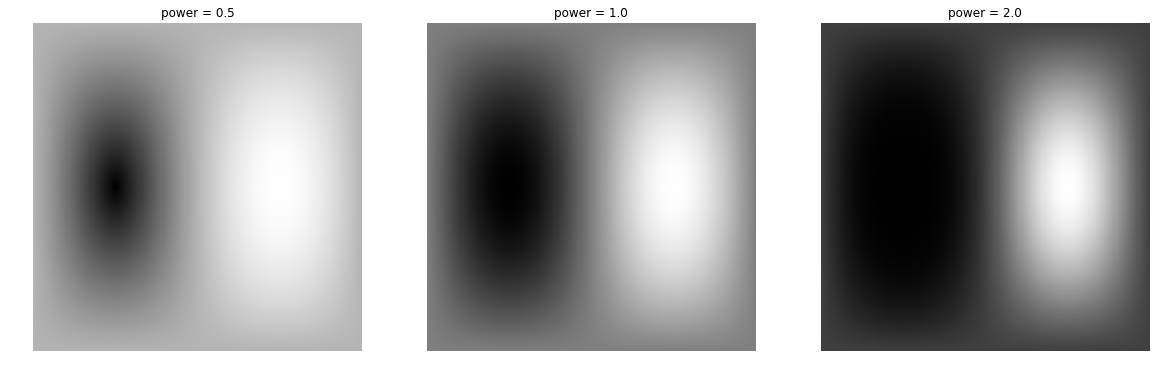

In [12]:
fig, axes = plt.subplots(1,3,figsize=(20,60))
powers = [0.5, 1.0, 2.0]
for i in range(len(powers)): 
    func = lambda value : my_cmap_func(value, powers[i], powers[i], powers[i])
    data_RGB = np.stack(func(data), axis=2)
    axes[i].imshow(data_RGB)
    axes[i].axis('off')
    axes[i].set_title("power = %.1f"%powers[i])

## 2) use as a matplotlib cmap

Now we create a Matplotlib colour map.<br>
https://matplotlib.org/tutorials/colors/colormap-manipulation.html

The function ```ListedColormap(colors)``` takes a list of RGB values. So we define a ramp

In [13]:
ramp = np.linspace(0,1,256)
ramp.shape

(256,)

(cmaps commonly have 256 levels because R,G,B values are 8-bit, but really ```colors``` may have any length)<br>
and we generate a list of RGB triplets

In [14]:
colors = np.array(map(my_cmap_func, ramp))
colors.shape

(256, 3)

We create the colour map with

In [15]:
my_cmap = mpl.colors.ListedColormap(colors)
my_cmap

For a given value in [0,1], the function ```my_cmap()``` returns the closest (interpolated) RGBA colour (we didn't specify the opacities, so A = 1)

In [16]:
my_cmap(0.5)

(0.50196078431372548, 0.50196078431372548, 0.50196078431372548, 1.0)

We can now use it with Matplotlib functions

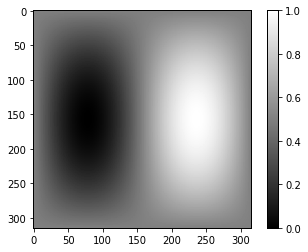

In [17]:
plt.imshow(data, cmap=my_cmap)
plt.colorbar();

We can even register it as a Matplotlib cmap, identified by name.

In [18]:
mpl.cm.register_cmap(cmap=my_cmap, name="my_cmap")

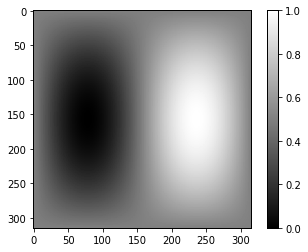

In [19]:
plt.imshow(data, cmap='my_cmap')
plt.colorbar();